# ANZ Bank Analytics Challenge

## Business Case:
In the banking sector, predicting whether a loan will default or be repaid is crucial for managing financial risks. When banks offer loans, they want to ensure that they can recover the money they lend. Incorrectly approving loans that will default or denying loans that would be repaid can have significant financial consequences.

By accurately predicting whether a loan is likely to default or not, banks can:

• Improve profitability by minimising defaults.
• Enhance customer experience by making timely, well-informed decisions about loan approvals.
• Reduce risks by identifying high-risk customers early and taking appropriate actions.
 

In this mission, you are hired by ANZ Bank use a loan dataset to predict whether a loan will be approved or default. The dataset includes features such as person's age, education, income, loan amount, loan interest rate, and credit score.
 
The target variable is: loan_status (1 = Loan defaulted, 0 = Loan approved).
 


In [2]:
# Task 4- Loading the dataset 

connect_str = "DefaultEndpointsProtocol=https;AccountName=level5data;AccountKey=cWgxWhPELQdrW0sIgA/eXM8/k9+xdaELukN8sg5imfhm4wVIJQFmypEph/Ppy500v41mYT+iCBbC+AStsfHbAQ==;EndpointSuffix=core.windows.net"
container_name = "businesscases"
blob_name = "Final_Mission_loan_data.csv"

import pandas as pd
from azure.storage.blob import BlobServiceClient
from io import StringIO

#downloading blob as csv string, and converting to a pandas Dataframe
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)
blob_data = blob_client.download_blob()
csv_content = blob_data.readall().decode('utf-8')
df = pd.read_csv(StringIO(csv_content))
display(df)

In [3]:
#Task 5- Perform Exploratory Data Analysis (EDA)

# 5.1- Inspect the dataset for missing values and data types.

missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

print(f"Data Types:\n{df.dtypes}")

Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Data Types:
person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length         

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.5 MB/s eta 0:00:00ta 0:00:01


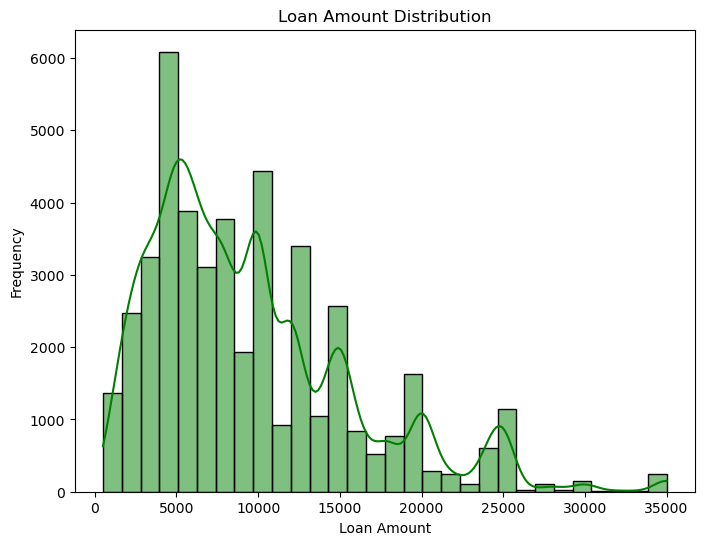

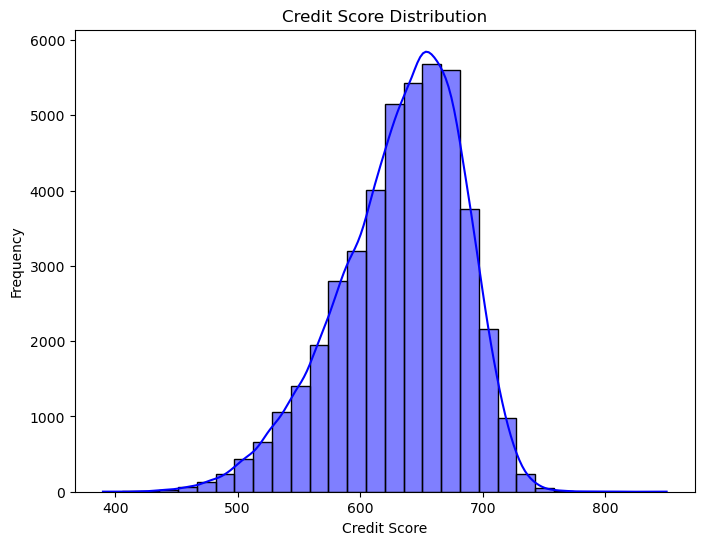

/tmp/ipykernel_403/1378074079.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set1')


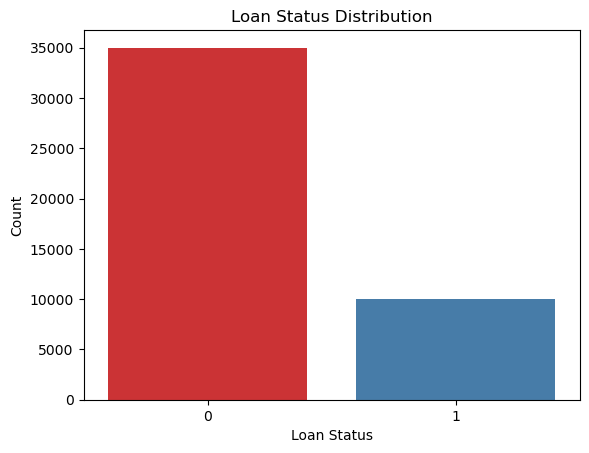

In [4]:
#5.2- Visualise the distribution of loan amounts, credit scores, and loan statuses.

!pip install seaborn matplotlib #to enable visualisations 
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='green')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

#Distribution og Credit Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['credit_score'], bins=30, kde=True, color='blue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

#Distribution of loan status
sns.countplot(x='loan_status', data=df, palette='Set1')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

#### Explanations of the distributions:
Distribution of Loan Amount
The distribution is positively skewed, which indicates there are outliers who have much higher loan statuses than the general sample. The majority of people in this ANZ bank dataset have loan amounts between $3,000 t0 $12,000. 

##### Distribution of Credit Score
It is more normally distributed, with the majority of the credit scores lying between 600 and 700. 

##### Loan Status Distribution
1 = Loan Defaulted
0 = Loan Approved 

There is more data for those that had their loan defaulted, which may act as a limitation to predict loan status, as predictive models may not have enough representation of factors that lead to defaulted loans compared to those that are approved. 

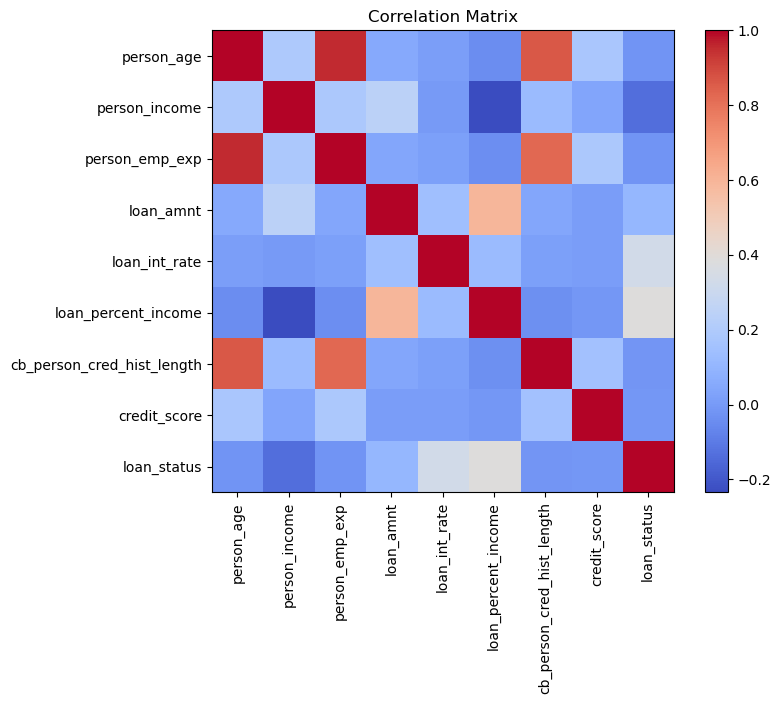

In [5]:
#5.3 Check for correlations between features and the target variable (loan_status).

#selecting numeric columns and calculating
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

#heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Task 6 - Clean and preprocess the data:

# 6.1- Handling missing values.

# no missing values but code for removing missing has been provided anyway
df = df.dropna()

In [7]:
# 6.2- Encode categorical variables such as person_gender, person_education, and person_home_ownership.

#converting so they can be included in models
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership','loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
# 6.3 - Split the data into features (X) and target (y).

X = df[['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']]
y = df['loan_status']

In [9]:
# 6.4 - Split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the split data
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (36000, 13), Testing Data: (9000, 13)


In [10]:
# Task 7- Train Multiple Models

# 7.1 - Logistic Regression:

from sklearn.linear_model import LogisticRegression

#fitting and training the model to predict on test set
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

/home/trusted-service-user/jupyter-env/python3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🏃 View run musing_nose_pq0dzgy1 at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b/runs/bf985322-80ed-4ce4-8daa-44344b5487cc
🧪 View experiment at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b


In [11]:
# 7.2 - Random Forest Classifier:

from sklearn.ensemble import RandomForestClassifier

#fitting and training the model to predict on test set
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

🏃 View run neat_answer_j4nnt69q at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b/runs/fbced7af-5cfd-4ef1-b46e-74b2d23d0a45
🧪 View experiment at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b


In [12]:
# 7.3 - Additional Model of Your Choice:

from xgboost import XGBClassifier

#fitting and training the model to predict on test set
model_xgb = XGBClassifier(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

🏃 View run great_match_hx33l17l at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b/runs/2c420b4f-bfc1-4350-a157-3ab31b113115
🧪 View experiment at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/be6e6894-e10a-405c-85da-dd5038522c4b


In [13]:
# Task 8 - Evaluate the Models

# 8.1 - Create table with Actual vs Predicted values for each model

df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Logistic': y_pred_logistic,
    'Predicted_RF': y_pred_rf,
    'Predicted_XGB': y_pred_xgb
})

display(df_comparison.head())

In [14]:
# Compare the performance of all three models using Accuracy and Confusion Matrix:

from sklearn.metrics import accuracy_score, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.8258888888888889
Logistic Regression Confusion Matrix:
 [[6820  170]
 [1397  613]]
Random Forest Accuracy: 0.9286666666666666
Random Forest Confusion Matrix:
 [[6797  193]
 [ 449 1561]]

XGBoost Accuracy: 0.9365555555555556
XGBoost Confusion Matrix:
 [[6796  194]
 [ 377 1633]]


In [15]:
# Task 9

# Logistic Regression had the lowest accuracy at 82.58% and the highest number of false negatives (1,397), indicating that it struggled to correctly identify loan defaulters. 
# The Random Forest model performed significantly better, with an accuracy of 92.87% and fewer false negatives (449), thanks to its ability to capture complex relationships in the data. 
# The XGBoost model outperformed both, achieving the highest accuracy of 93.66% and the lowest number of false negatives (377). Its gradient boosting approach allowed it to iteratively correct errors, making it the most effective model for predicting loan defaults.

In [15]:
# Task 10

df_results_spark = spark.createDataFrame(df_comparison) 
df_results_spark .createOrReplaceTempView("df_results_spark_view")
df_spark= spark.table("df_results_spark_view")
df_results_spark.write.mode("overwrite").saveAsTable("Mission_ready_data_lakehouse.Actual_vs_Predicted")

spark.sql("SELECT * FROM mission_ready_data_lakehouse.Actual_vs_Predicted LIMIT 10").show()

StatementMeta(, 24f411dd-941a-4a80-a149-a89523f2853a, 17, Finished, Available, Finished)

+------+------------------+------------+-------------+
|Actual|Predicted_Logistic|Predicted_RF|Predicted_XGB|
+------+------------------+------------+-------------+
|     0|                 0|           0|            0|
|     0|                 0|           0|            0|
|     0|                 0|           0|            0|
|     1|                 0|           1|            1|
|     1|                 0|           0|            0|
|     0|                 0|           0|            0|
|     0|                 0|           0|            0|
|     1|                 0|           1|            1|
|     0|                 0|           0|            0|
|     1|                 1|           1|            1|
+------+------------------+------------+-------------+



In [16]:
# Task 11

# The XGBoost model performed the best at predicting loan defaults, achieving the highest accuracy (93.66%) and the lowest number of false negatives. 
# This indicates that XGBoost is most effective at identifying risky borrowers who are likely to default, which is critical for minimizing financial losses. 
# By using this model, the bank can make more informed lending decisions, reduce default rates, and improve overall credit risk management. 
# Implementing such a model in the loan approval process can help the bank allocate funds more securely and increase profitability by avoiding high-risk loans.

StatementMeta(, 24f411dd-941a-4a80-a149-a89523f2853a, 18, Finished, Available, Finished)